# Project Bonus: California House Dataset (part5)

In [8]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow
import seaborn as sns
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
# Loading the data
# Importing the california housing dataset
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [10]:
# Description of dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
# Display the dataset shape
california.data.shape

(20640, 8)

In [12]:
# Display the target array of the dataset
california.target.shape

(20640,)

In [13]:
# Display the feature names in the dataset
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Breaking down the Dataset with Pandas

In [14]:
# Set precesion for float to 4 decimals
pd.set_option('display.precision', 4)

# Set the maximum number of display columns
pd.set_option('display.max_columns', 9)

# Setting the display width
pd.set_option('display.width', None)

california_df = pd.DataFrame(california.data, columns = california.feature_names)

# Adding a new column
california_df ['MedHouseValue'] = pd.Series(california.target)

# Print first 5 rows of Dataset
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [15]:
# summarize stats
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Visualizations

In [16]:
# Create a graphical sample of 10% of rows
sample_df = california_df.sample(frac=0.1, random_state=17)

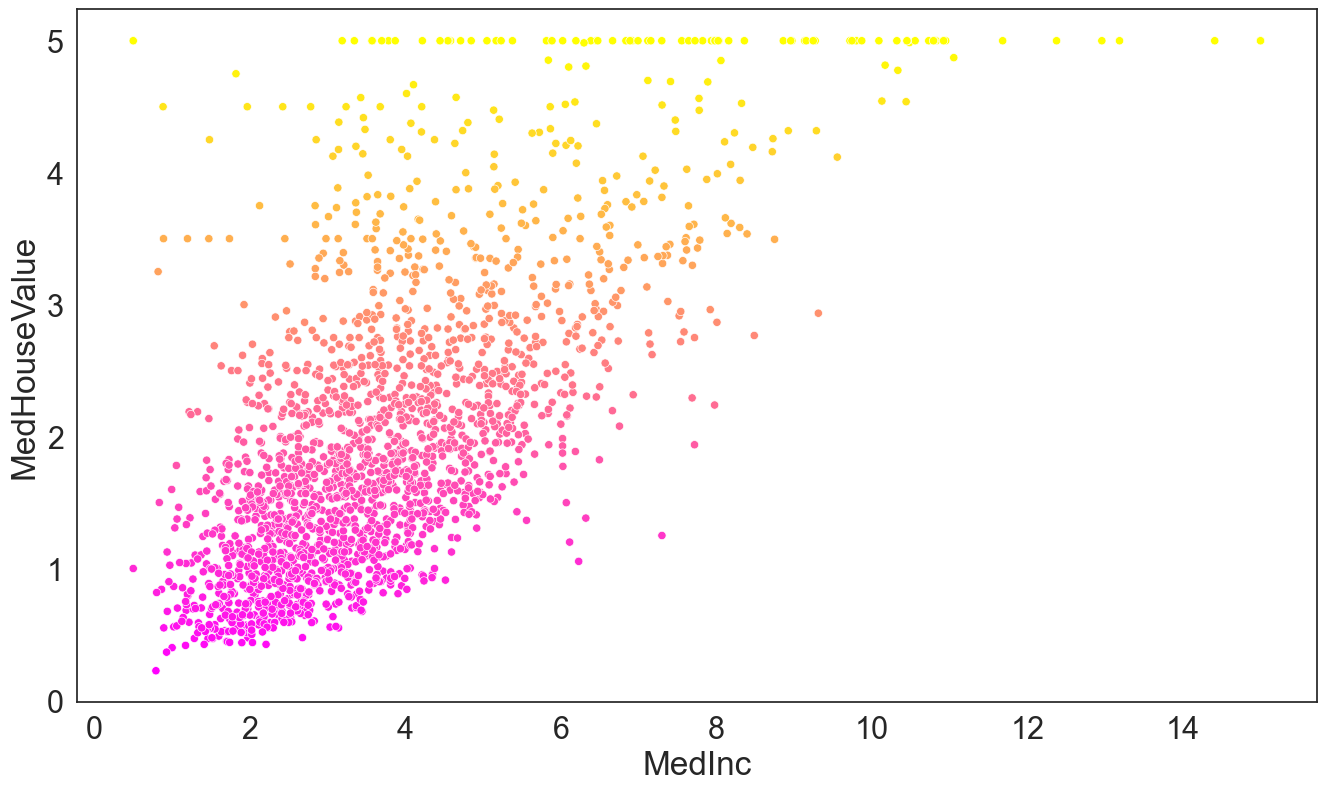

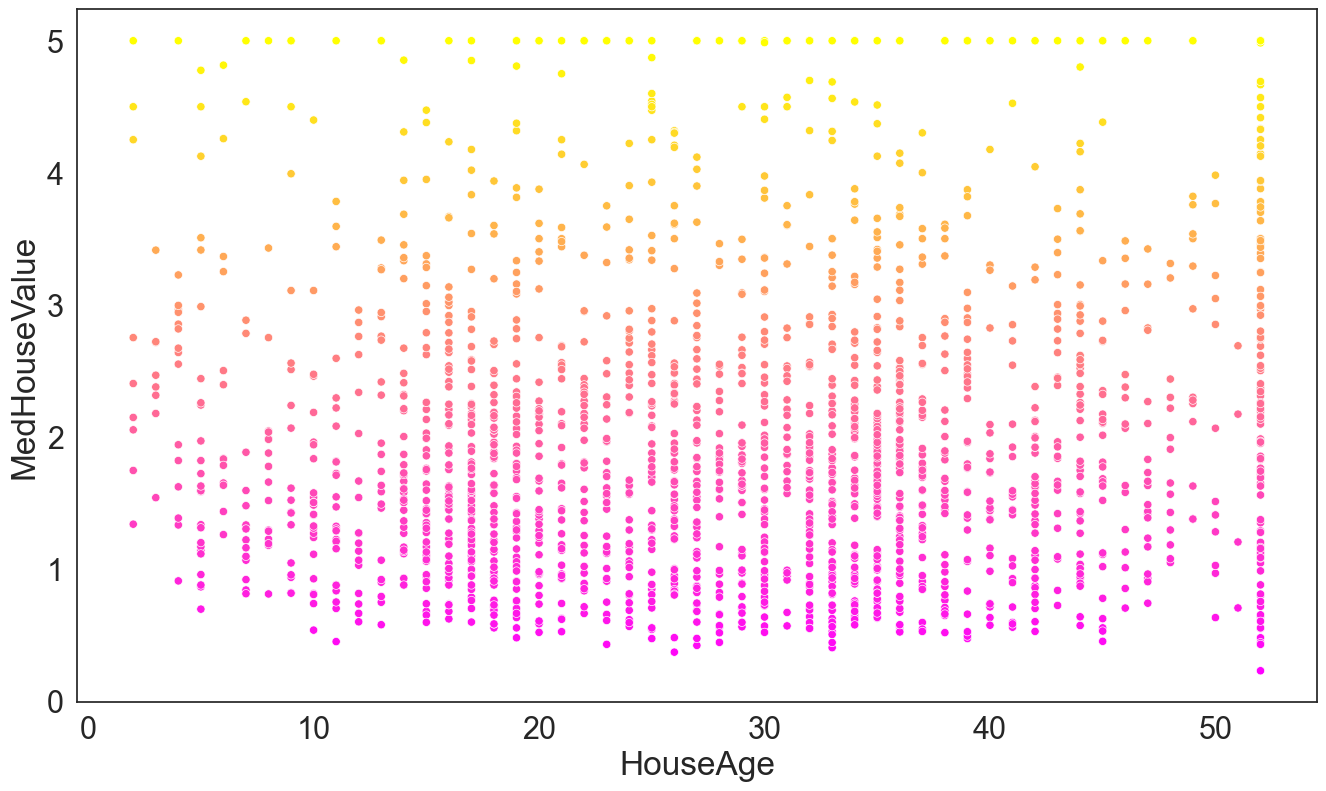

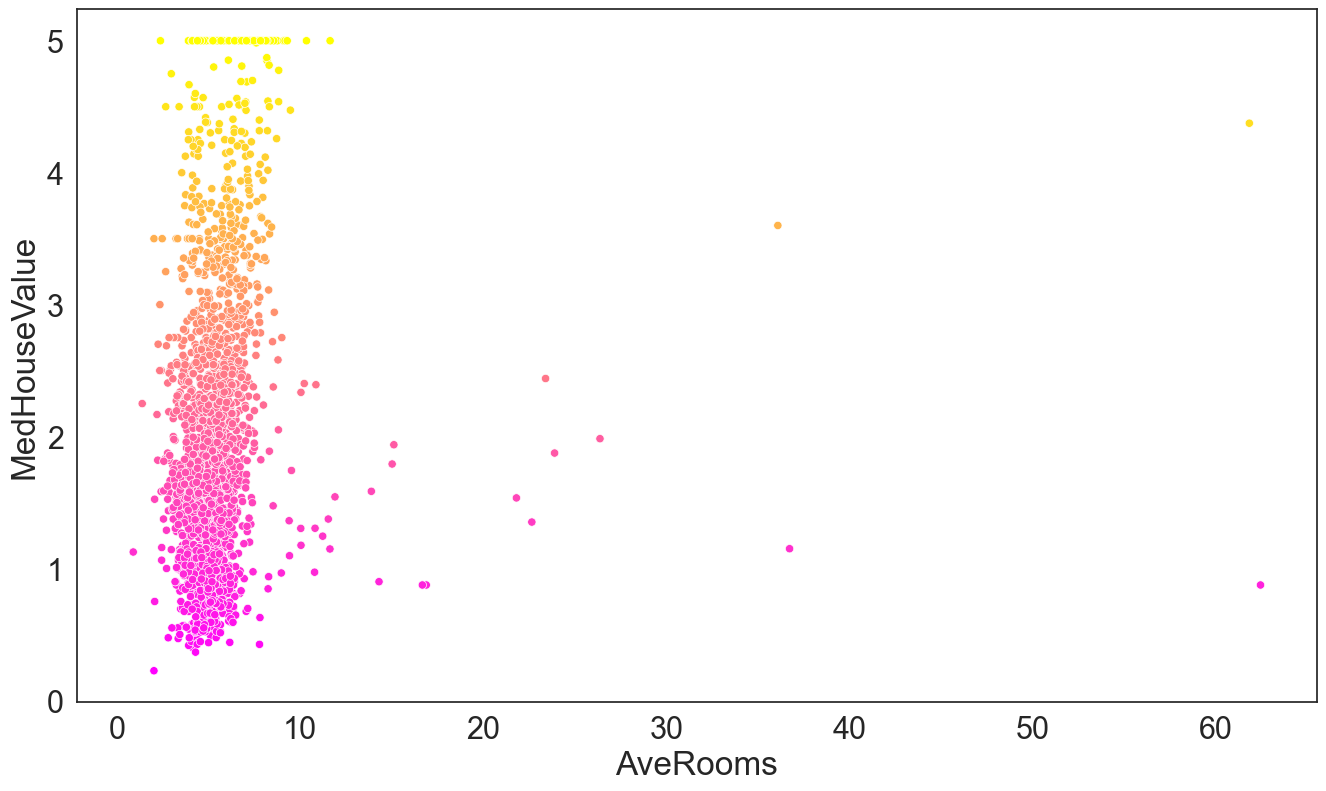

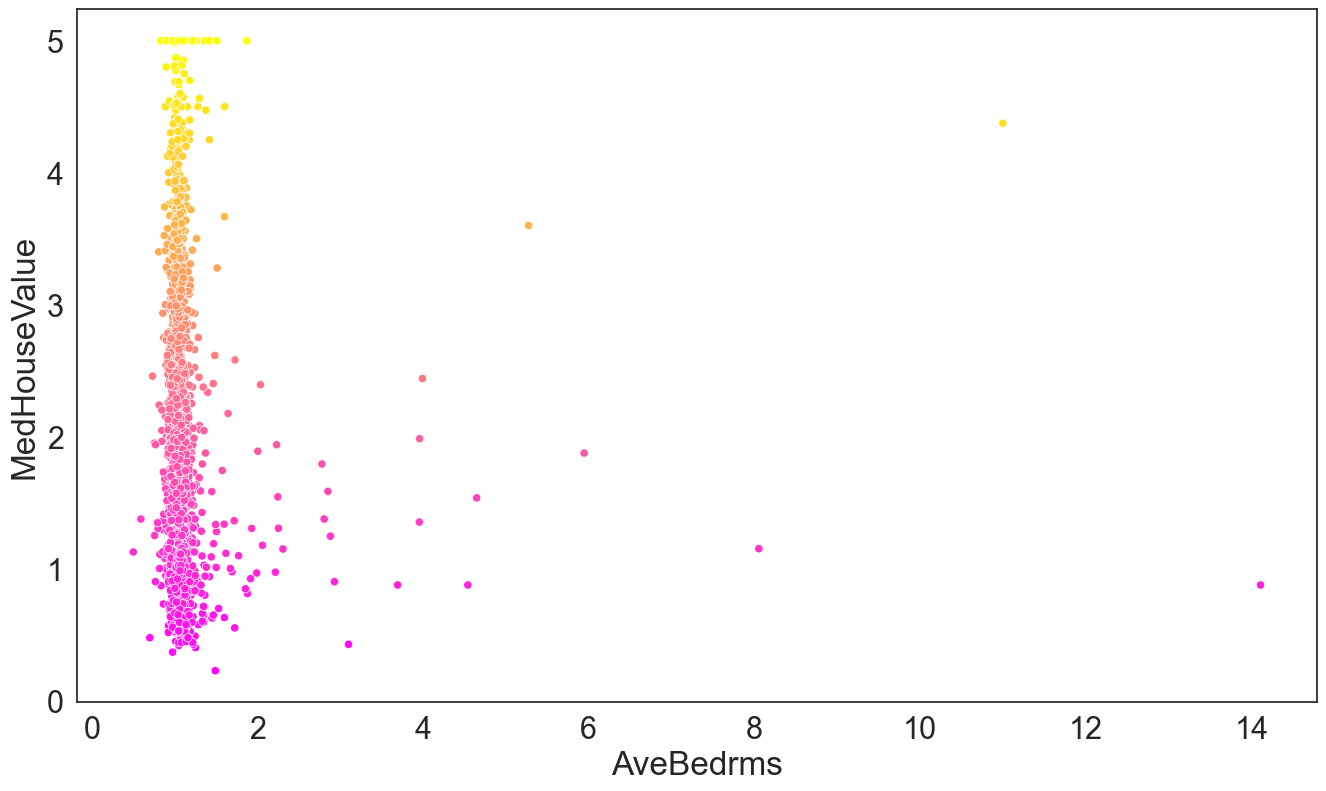

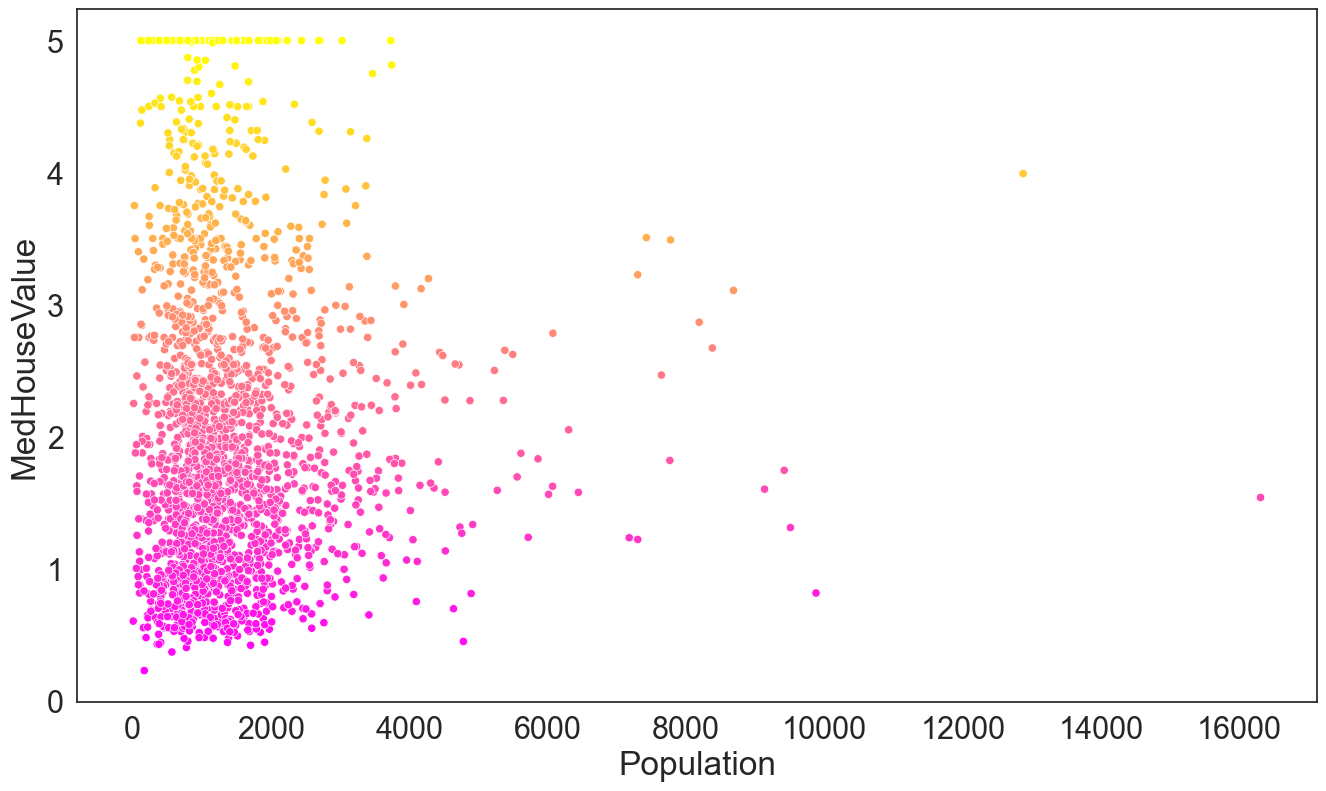

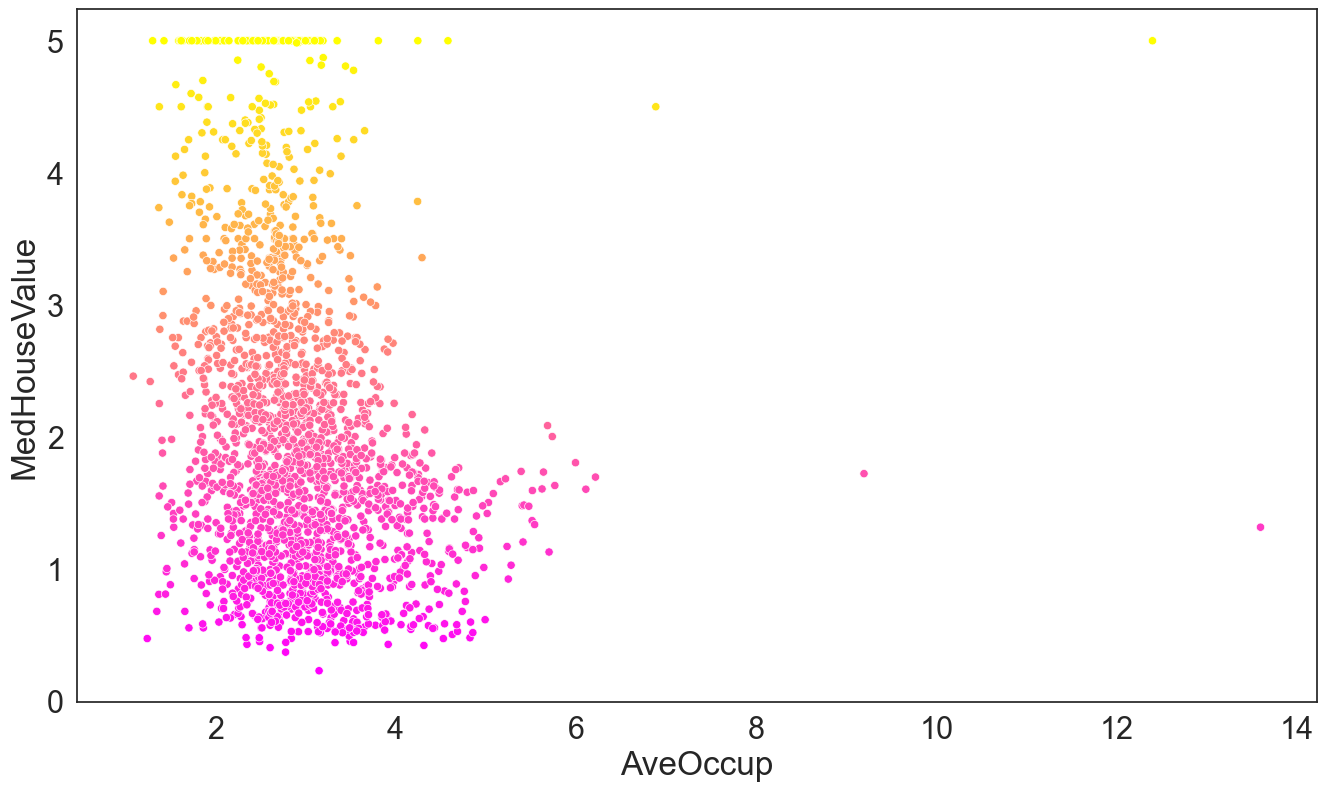

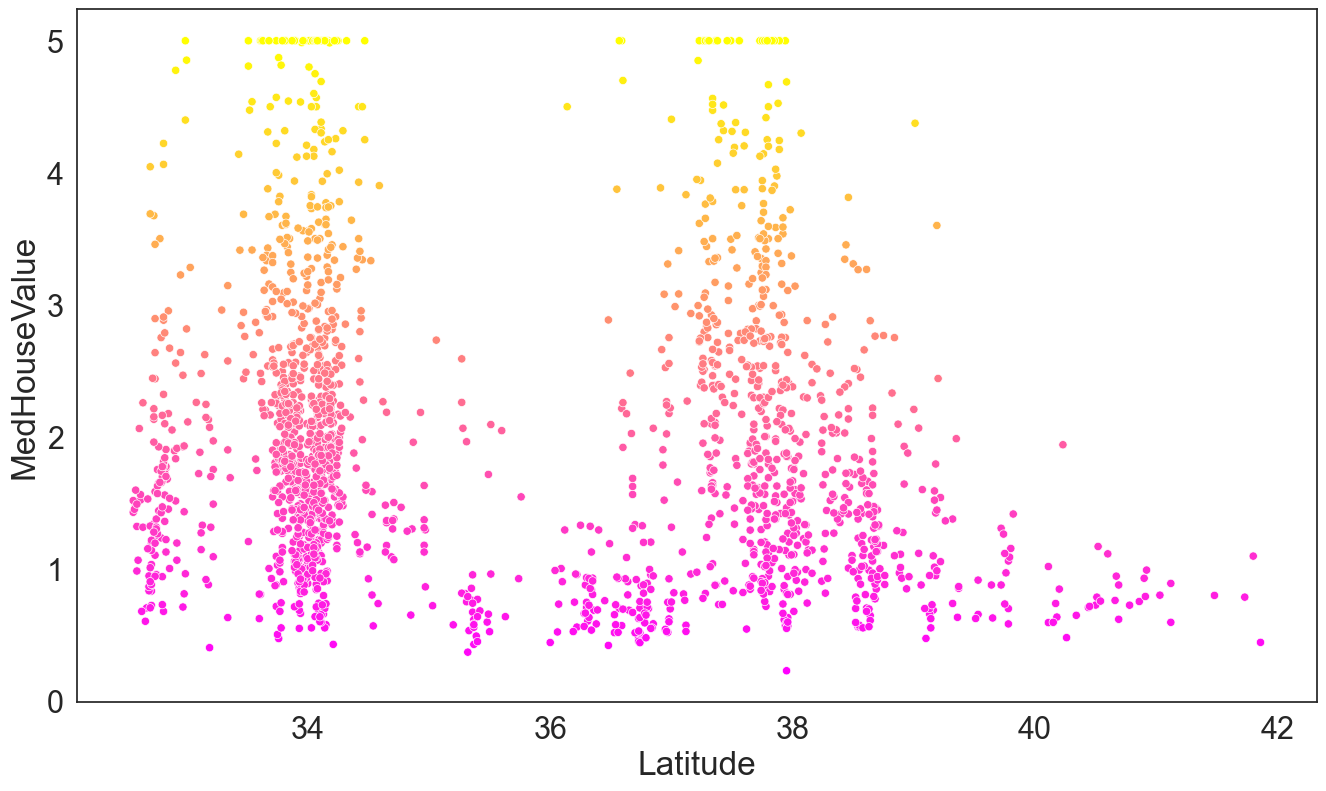

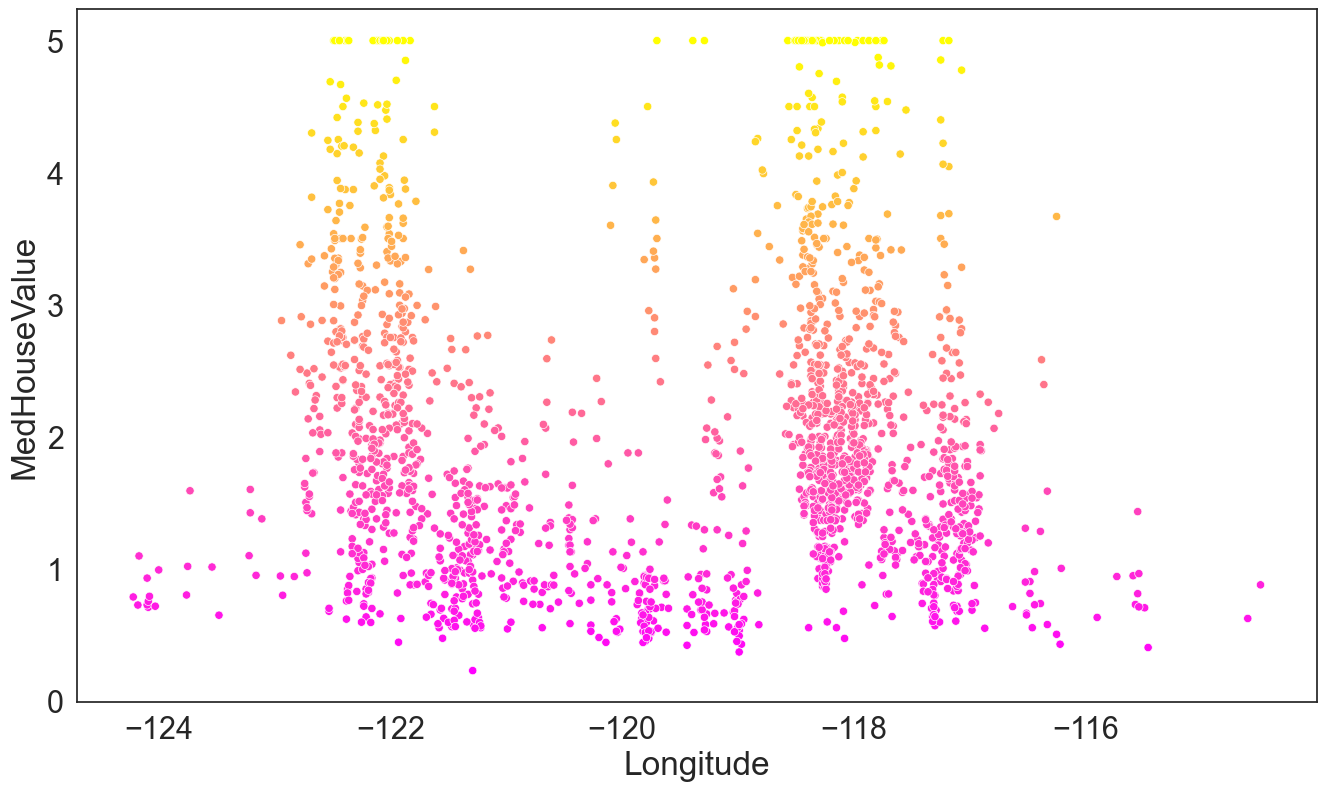

In [17]:
# Set visualization characteristics
sns.set(font_scale=2)
sns.set_style('white')

for feature in california.feature_names:
    plt.figure(figsize=(16, 9))

    # Creating the scatterplot
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='spring', legend=False)


## Splitting the Data for Training and Testing

In [18]:
# train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)


In [19]:
# train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [20]:
# Display the shape of training data
X_train.shape

(15480, 8)

In [21]:
# Display the shape of testing data
X_test.shape


(5160, 8)

### Training the Model

In [22]:
# Creating the Linear Regression model
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [23]:
# Print coefficients of linear regression
for i, name in enumerate(california.feature_names):
    print (f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382231
  HouseAge: 0.009216834565797702
  AveRooms: -0.10732526637360953
 AveBedrms: 0.6117133073918077
Population: -5.756822009306028e-06
  AveOccup: -0.00338456646571631
  Latitude: -0.41948186096490675
 Longitude: -0.4337713349874024


In [24]:
# Print linear regression intercept
linear_regression.intercept_

-36.88295065605558

### Testing the Model

In [25]:
# Test the model
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [26]:
# Display the expected values
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Visualize the Expected vs Predicted Price

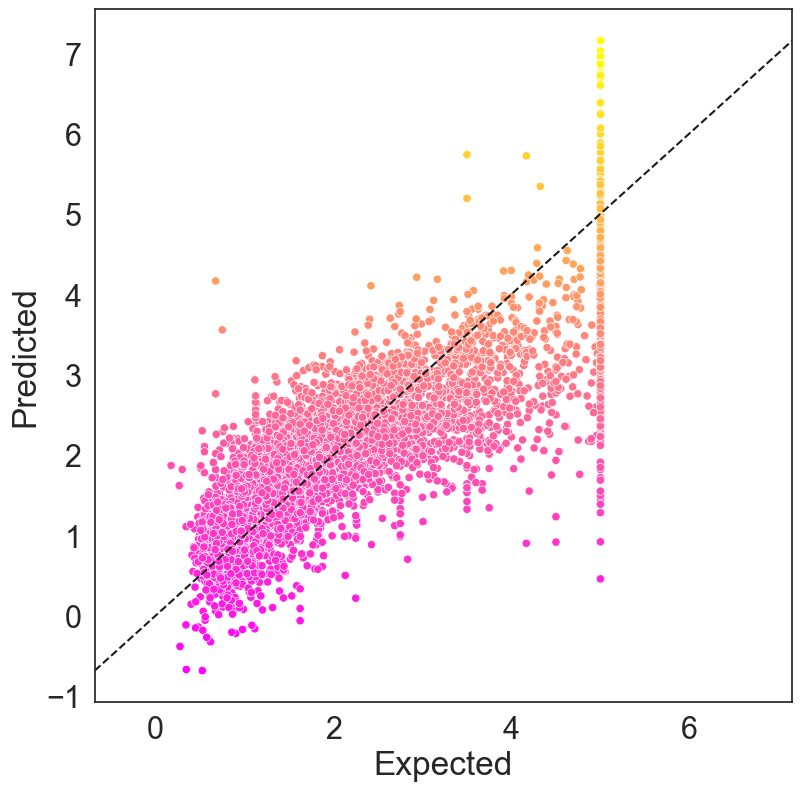

In [27]:
# Create a scatterplot to compare the expected vs predicted prices
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

figure =plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',hue='Predicted', palette='spring', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

# Add line to show if expected equaled predicted
line = plt.plot([start, end], [start, end], 'k--')

### Regression Model

In [28]:
# Calculate r2 score
metrics.r2_score(expected, predicted)

0.6008983115964328

In [29]:
# Calculate an Estimators mean squared error
metrics.mean_squared_error(expected, predicted)

0.5350149774449123

### Choosing the best model

In [30]:
# Import new linear regression models
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [31]:
# Create dictionary of estimators
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

In [32]:
# Import model selection
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


#### Choosing the best model
- The best r2 value we can receive from our 4 different models would be a score of 1.0! This means that that our top model has an r2 score of 0.599! So our best model choice is going to be the LinearRegression model or the Ridge model.